In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [2]:
data = pd.read_csv("/content/sample_data/2.1heart_cleveland_upload.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(297, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
22,34,1,0,118,182,0,2,174,0,0.0,0,0,0,0
147,41,1,2,130,214,0,2,168,0,2.0,1,0,0,0
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1,1
54,46,1,1,101,197,1,0,156,0,0.0,0,0,2,0
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0


In [9]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

In [12]:
print(data.corr()["condition"].abs().sort_values(ascending=False))

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64


**EDA**

In [13]:
y = data["condition"]

0    160
1    137
Name: condition, dtype: int64


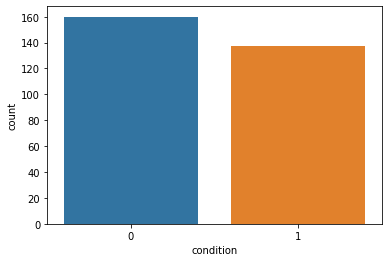

In [14]:
ax = sns.countplot(data["condition"])
condition_temp = data.condition.value_counts()
print(condition_temp)

0    160
1    137
Name: condition, dtype: int64


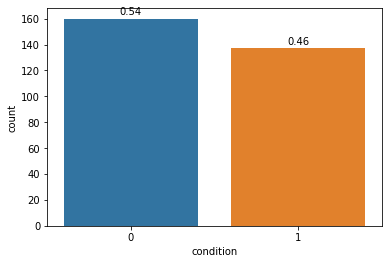

In [20]:
ax = sns.countplot(data["condition"])
condition_temp = data.condition.value_counts()
print(condition_temp)
# for showing the percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/297),
            ha="center") 

**Percentage of patient with or without heart problems in the given dataset**

In [21]:
print("Percentage of patience without heart problems: "+str(round(condition_temp[0]*100/297,2)))
print("Percentage of patience with heart problems: "+str(round(condition_temp[1]*100/297,2)))

Percentage of patience without heart problems: 53.87
Percentage of patience with heart problems: 46.13


In [22]:
data["sex"].unique()

array([1, 0])

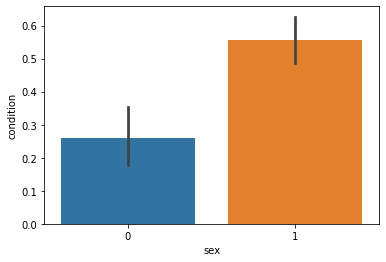

In [23]:
sns.barplot(data["sex"],data["condition"])

In [36]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='condition')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "condition"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='condition', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

AttributeError: ignored

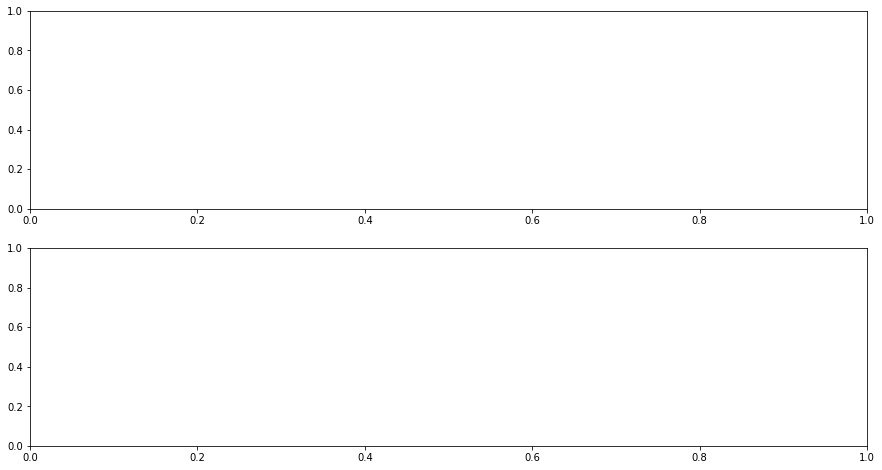

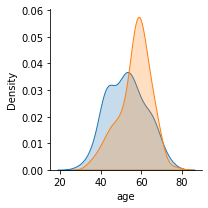

In [37]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

In [38]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:32.32%
Percentage of Male Patients:67.68%


In [39]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [40]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [42]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='condition', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'condition']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='condition', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

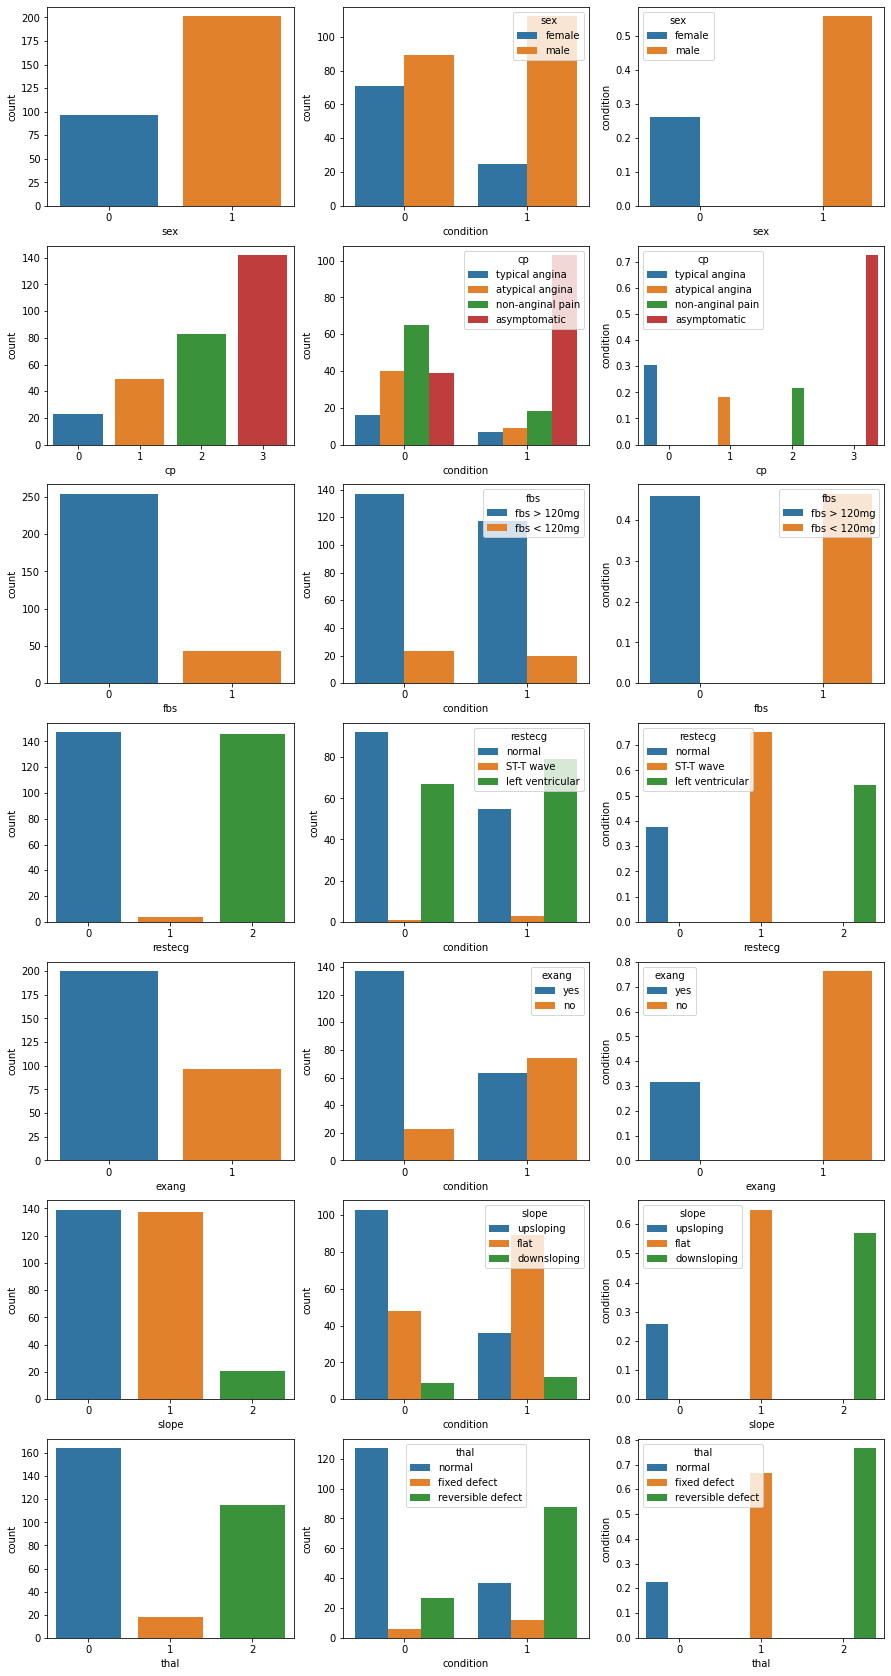

In [43]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [44]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [45]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='condition', y=attribute, data=data, ax=axes[ax_index][1])

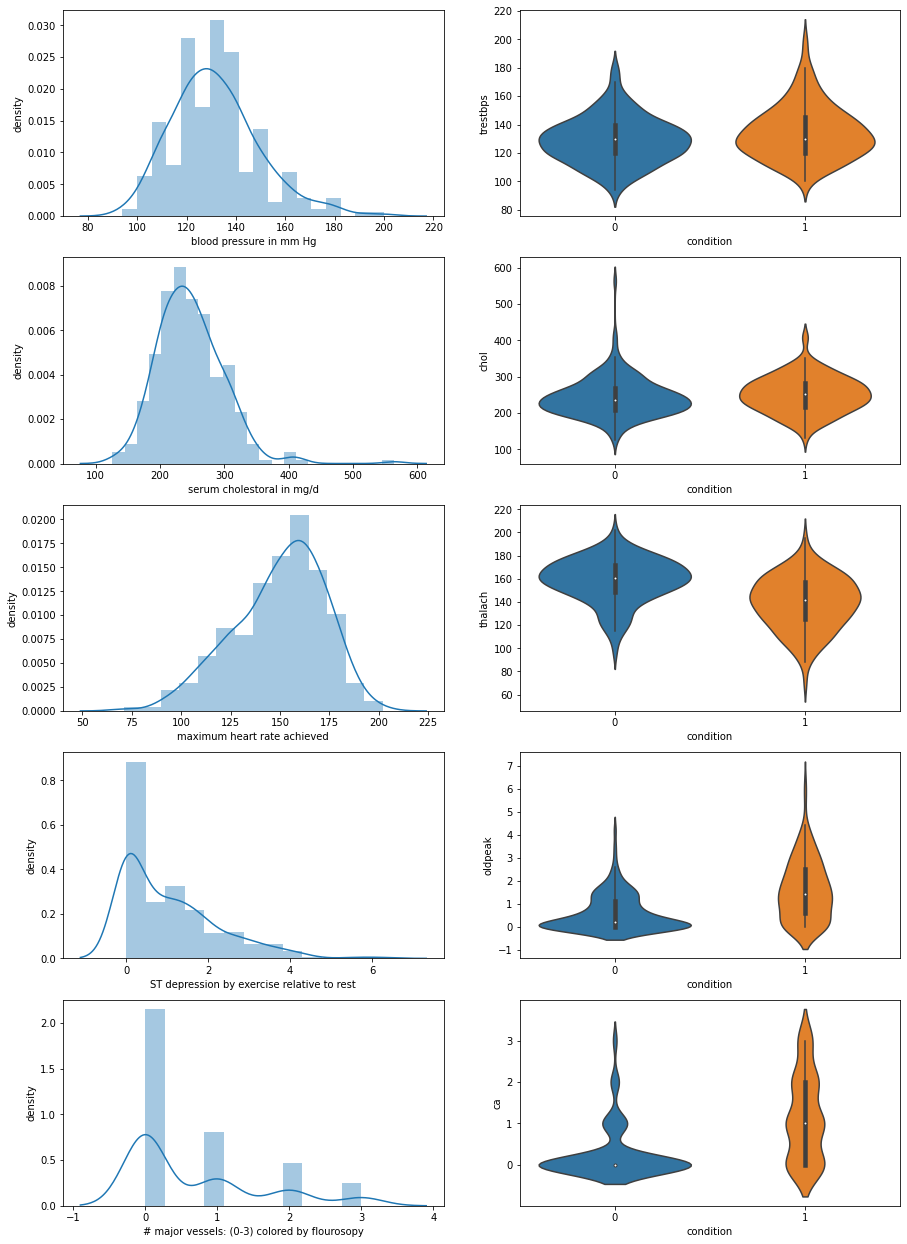

In [46]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

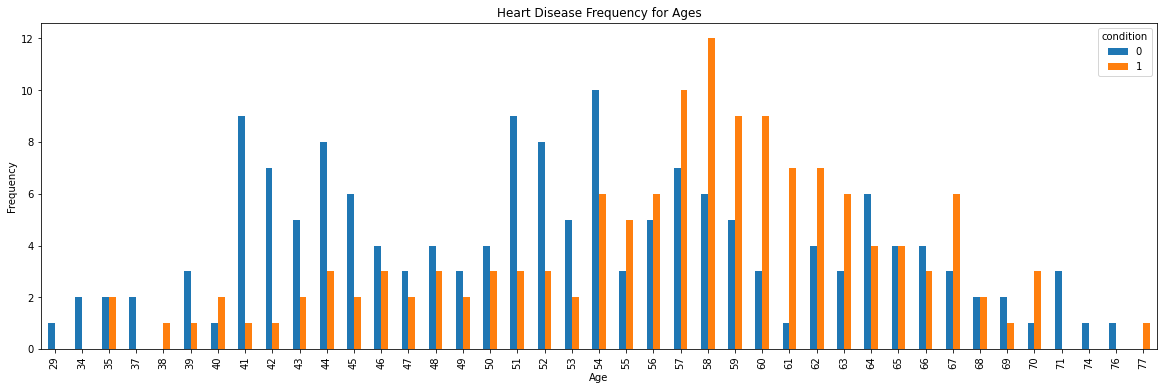

In [48]:
pd.crosstab(data.age,data.condition).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

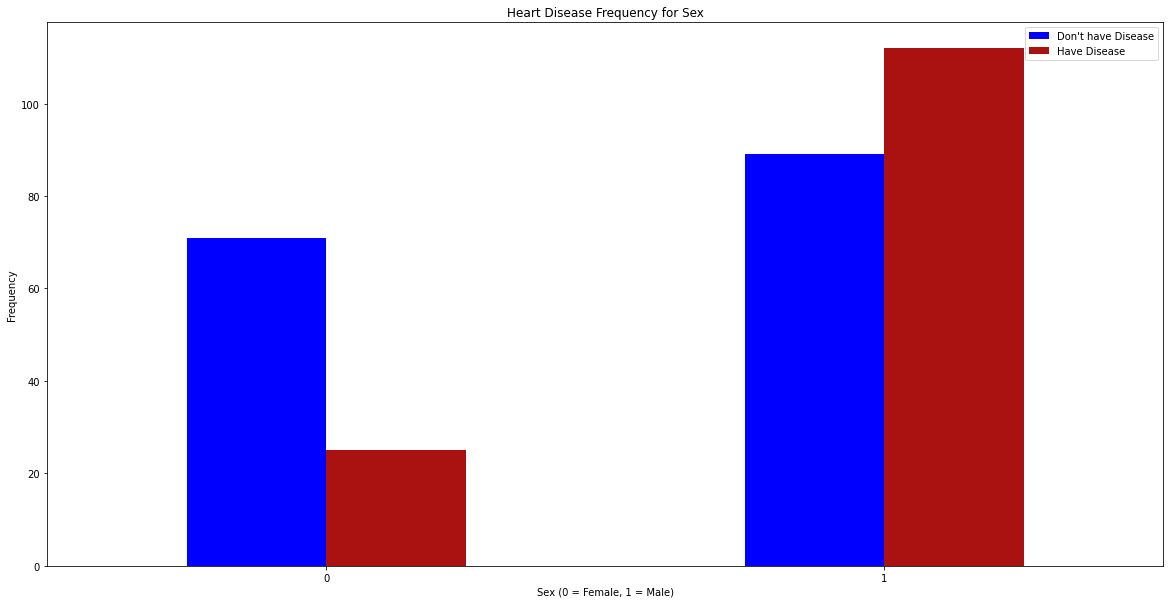

In [49]:
pd.crosstab(data.sex,data.condition).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [50]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [51]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


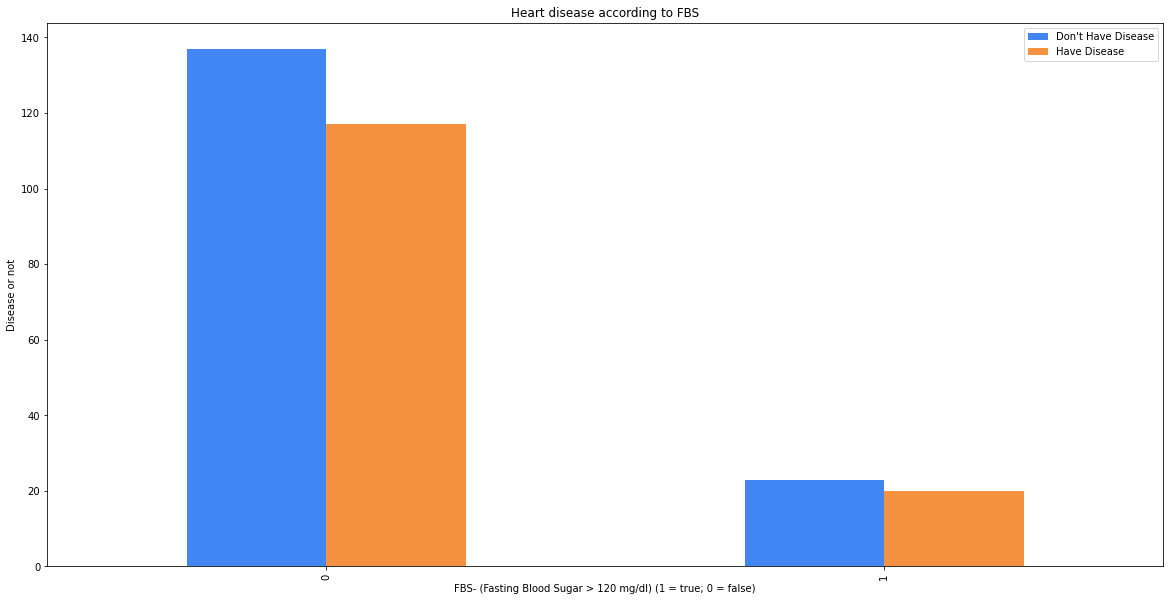

In [52]:
pd.crosstab(data.fasting_blood_sugar,data.condition).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

Analysing the chest pain (4 types of chest pain)
[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [53]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3])

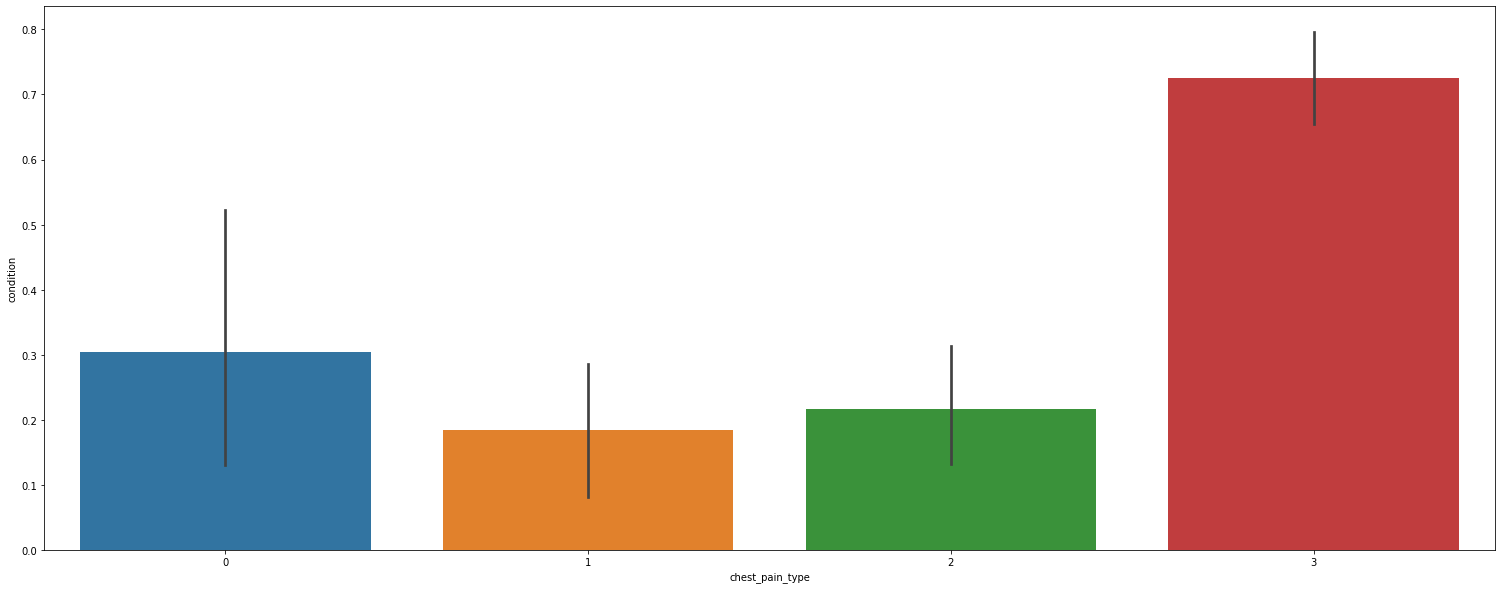

In [54]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

In [55]:
data["resting_blood_pressure"].unique()

array([160, 140, 150, 138, 110, 170, 145, 134, 178, 120, 118, 152, 125,
       148, 156, 128, 136, 130, 124, 154, 135, 132, 108, 192, 101, 105,
       112, 126, 122, 180, 115, 146, 155, 102, 172, 100,  94, 129, 142,
       144, 106, 117, 158, 174, 164, 114, 165, 200, 123, 104])

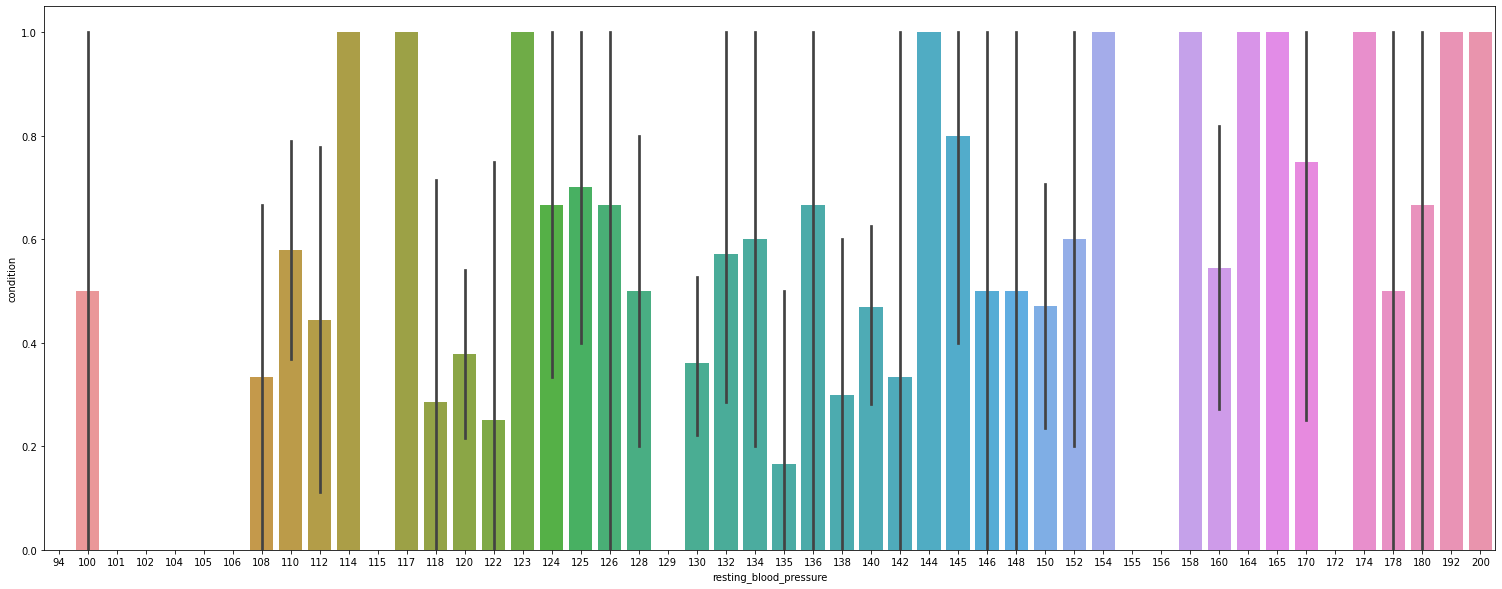

In [56]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [57]:
data["rest_ecg"].unique()

array([2, 0, 1])

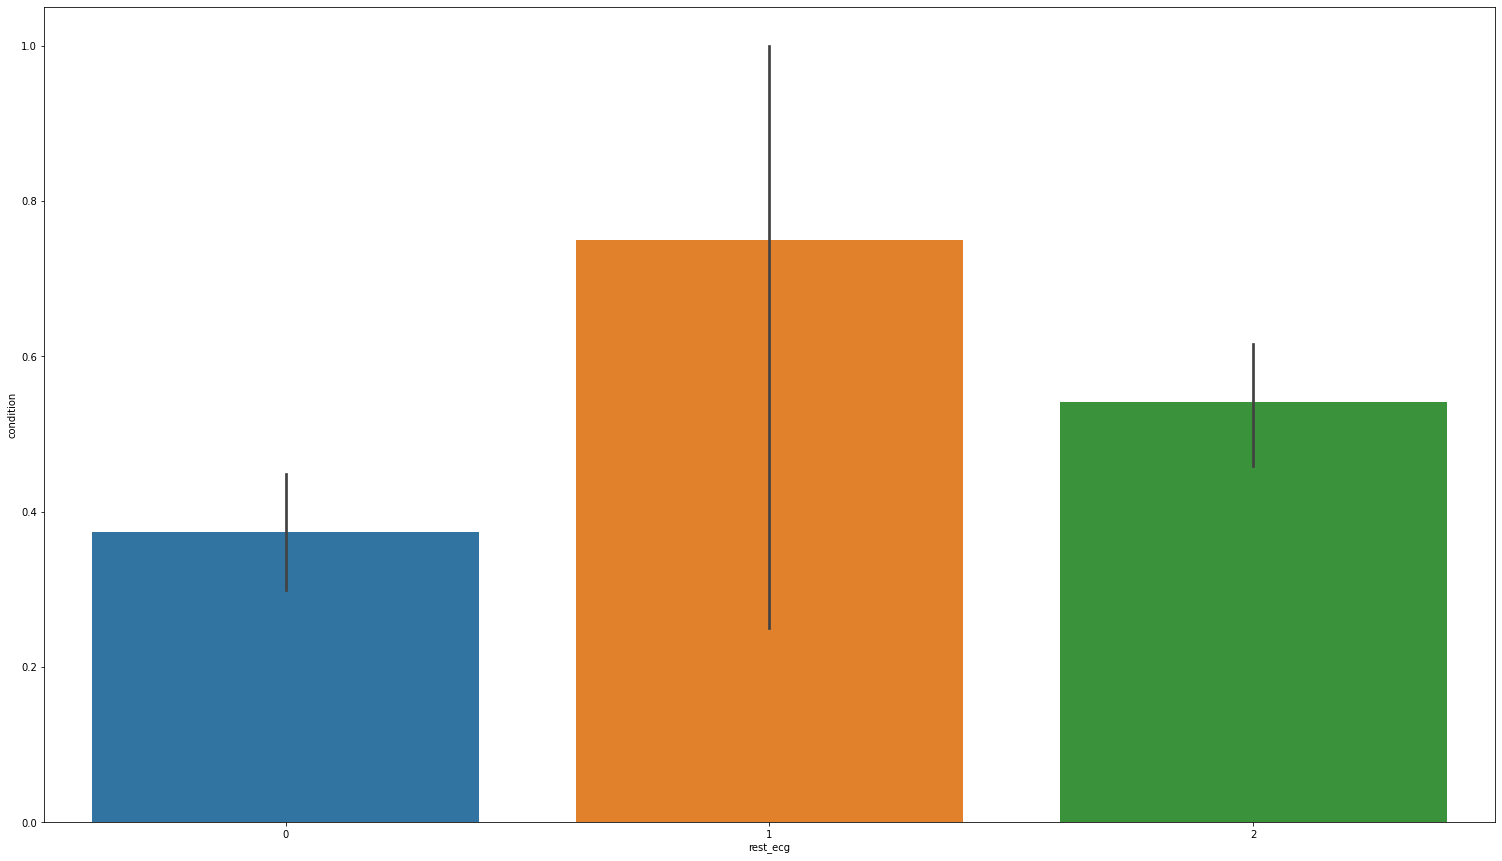

In [58]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'
Analysing Exercise induced angina (1 = yes; 0 = no)

In [59]:
data["exercise_induced_angina"].unique()

array([0, 1])

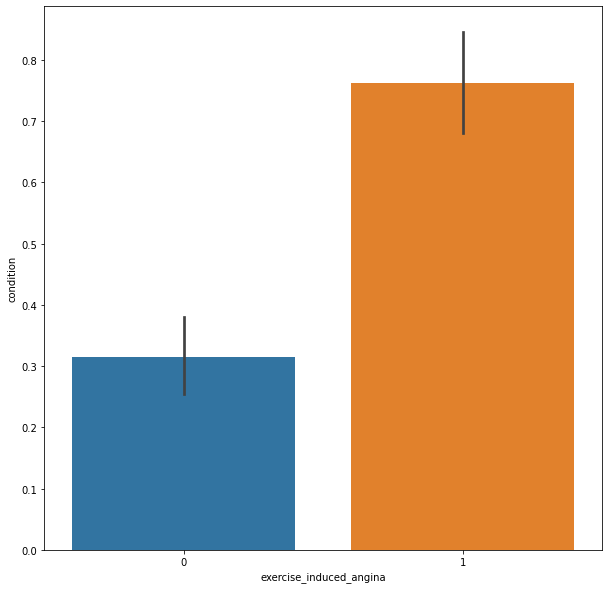

In [60]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

People with exercise_induced_angina=1 are much less likely to have heart problems
Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [61]:
data["st_slope"].unique()

array([1, 0, 2])

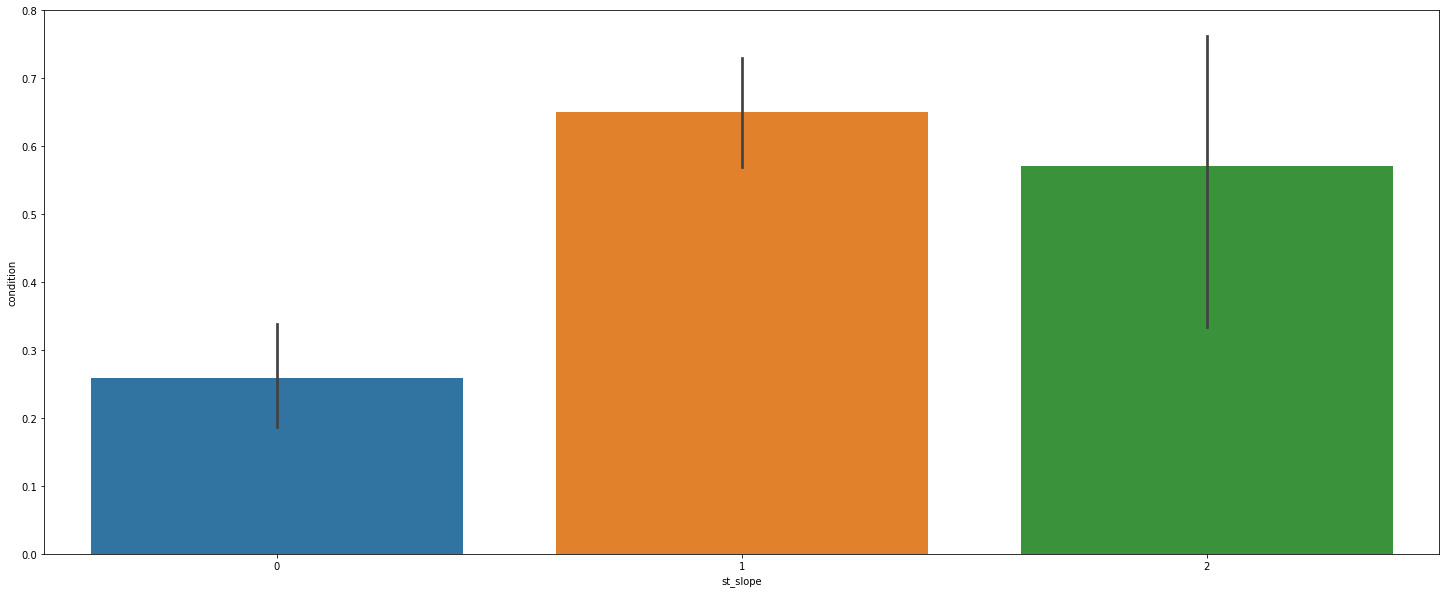

In [62]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

Analysing number of major vessels (0-3) colored by flourosopy

In [63]:
data["num_major_vessels"].unique()

array([1, 2, 0, 3])

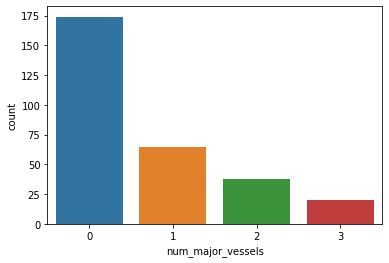

In [64]:
sns.countplot(data["num_major_vessels"])

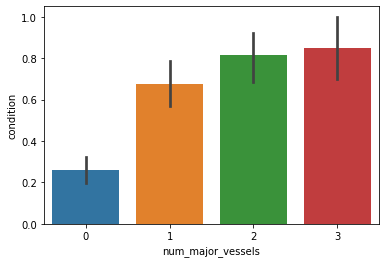

In [65]:
sns.barplot(data["num_major_vessels"],y)

Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [66]:
data["thalassemia"].unique()

array([0, 2, 1])

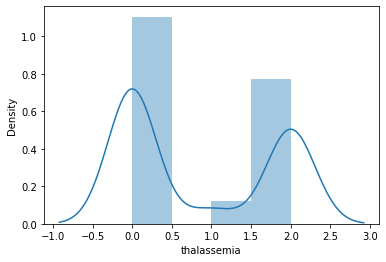

In [67]:
sns.distplot(data["thalassemia"])

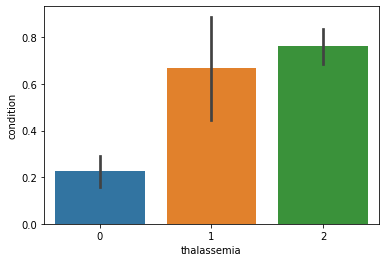

In [68]:
sns.barplot(data["thalassemia"],y)

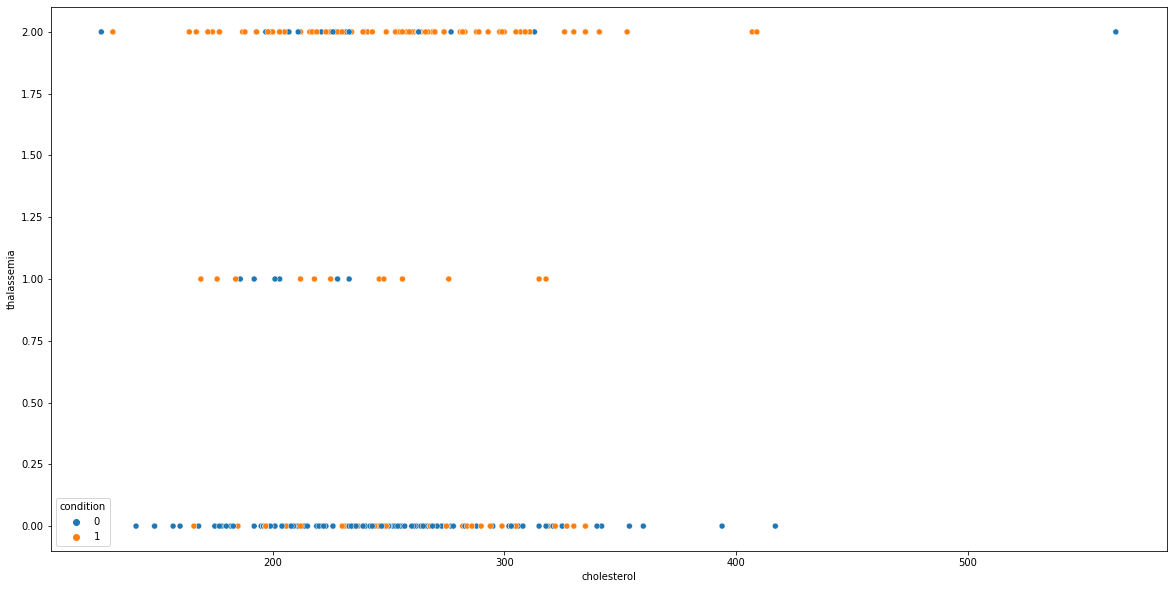

In [70]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='condition')
plt.show()

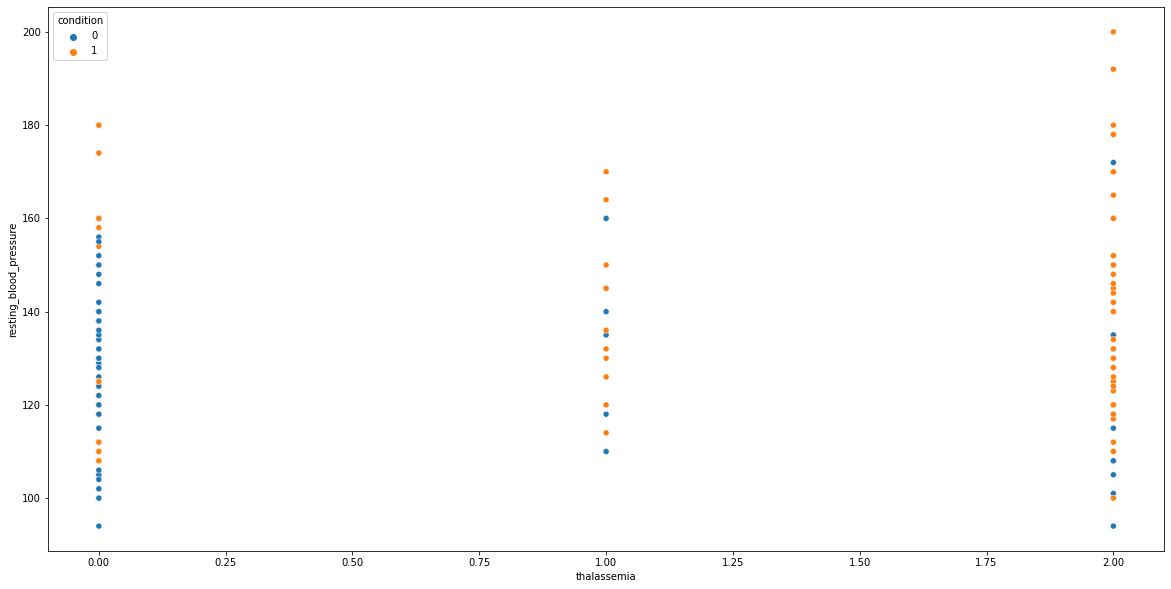

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='condition')
plt.show()

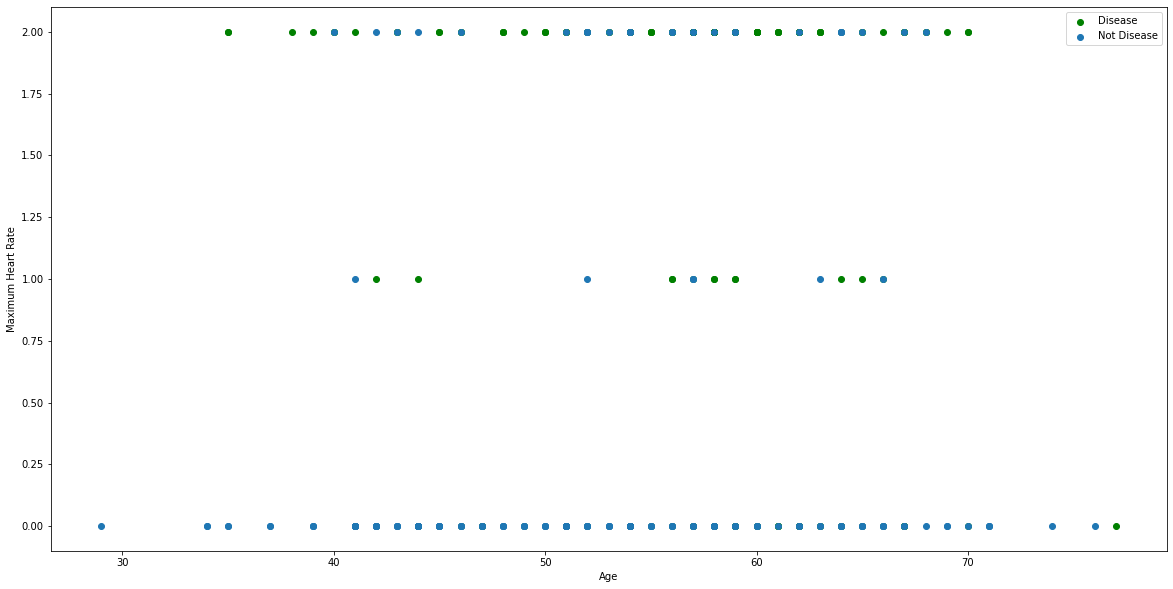

In [72]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.condition==1], y=data.thalassemia[(data.condition==1)], c="green")
plt.scatter(x=data.age[data.condition==0], y=data.thalassemia[(data.condition==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

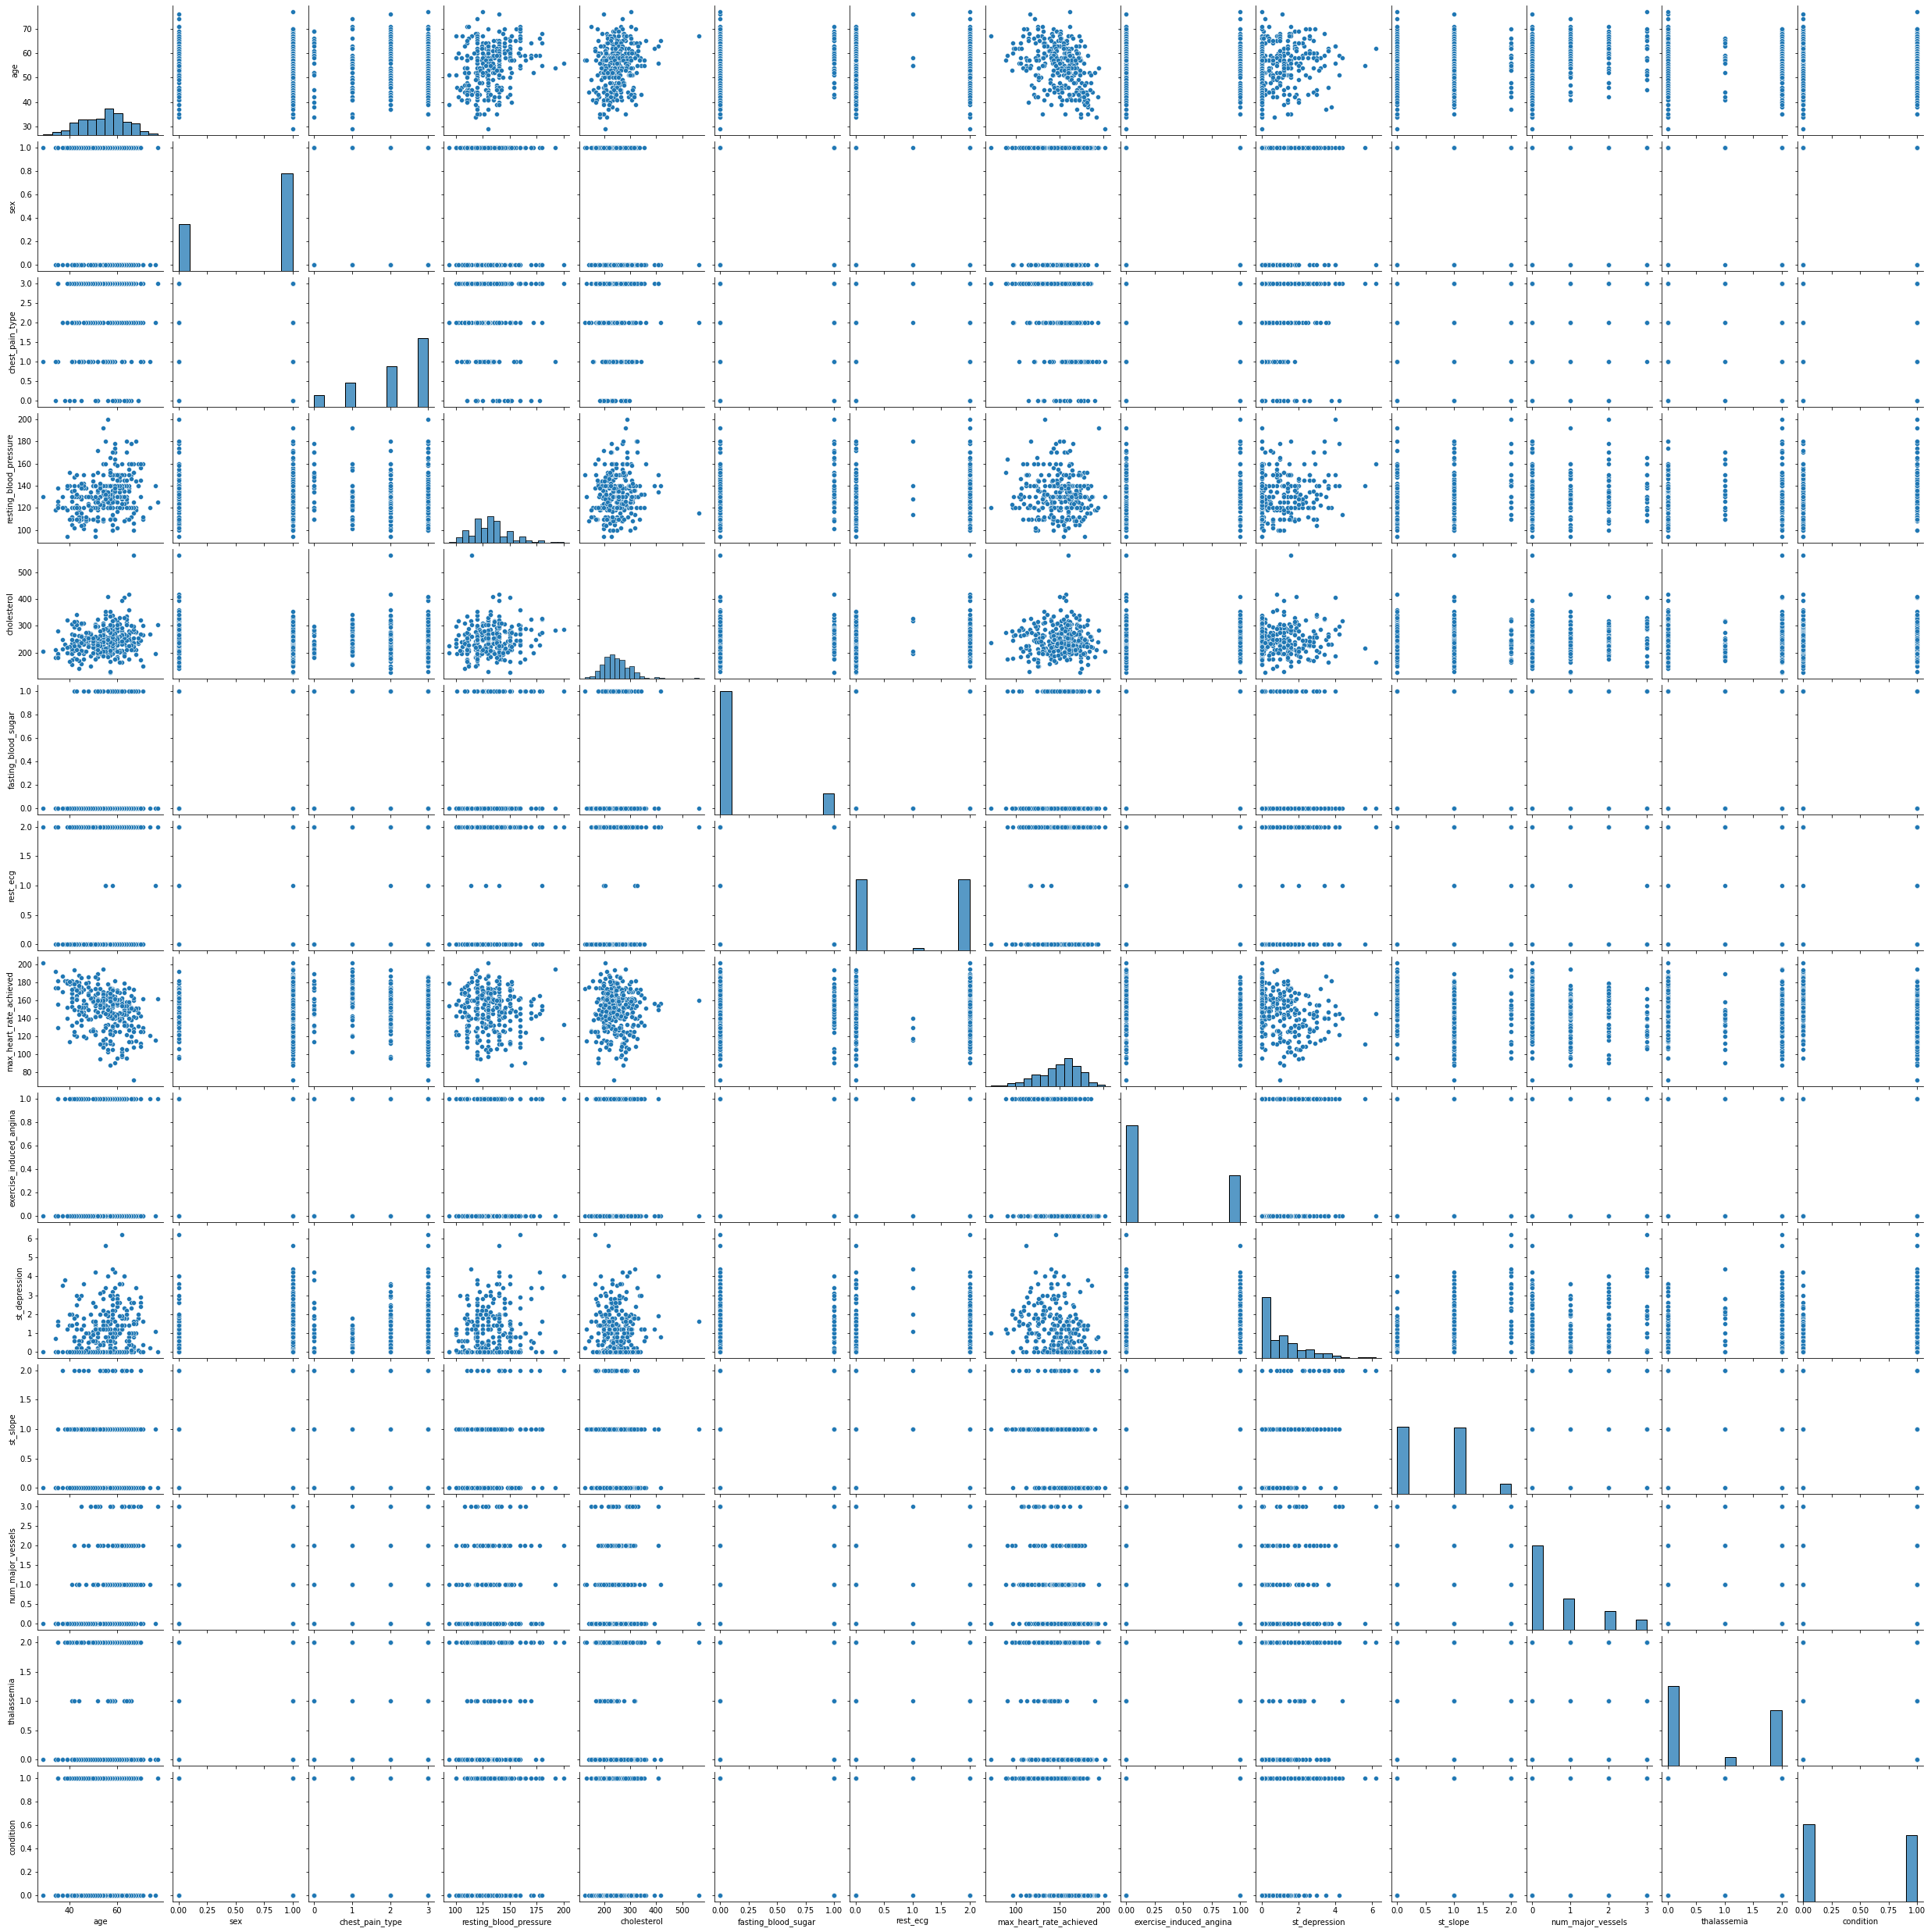

In [73]:
sns.pairplot(data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6d6009f90>,
      dtype=object)

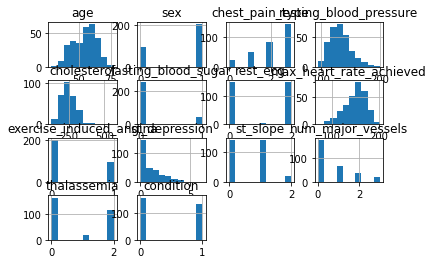

In [74]:
data.hist()

**Correlation plot**

In [75]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

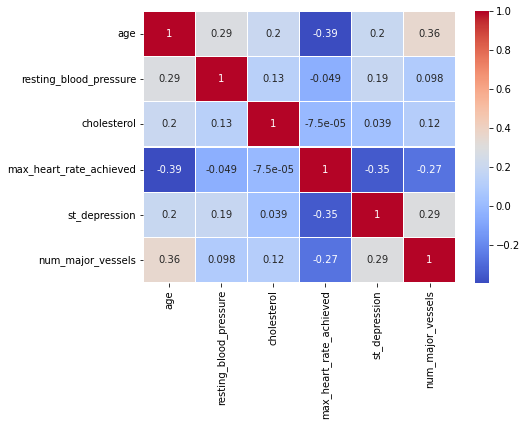

In [76]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [77]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,69,160,234,131,0.1,1
1,69,140,239,151,1.8,2
2,66,150,226,114,2.6,0
3,65,138,282,174,1.4,1
4,64,110,211,144,1.8,0
...,...,...,...,...,...,...
292,40,152,223,181,0.0,0
293,39,118,219,140,1.2,0
294,35,120,198,130,1.6,0
295,35,138,183,182,1.4,0


In [78]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','thalassemia','chest_pain_type']

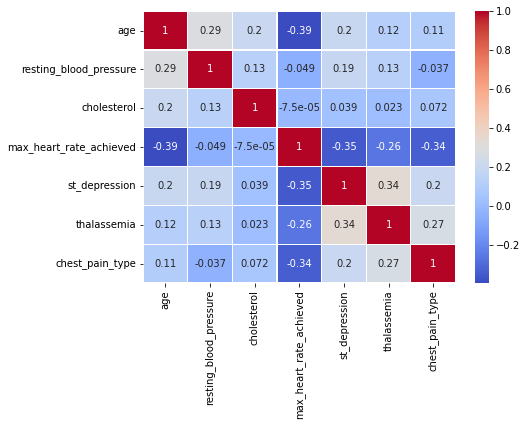

In [79]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [80]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,thalassemia,chest_pain_type
0,69,160,234,131,0.1,0,0
1,69,140,239,151,1.8,0,0
2,66,150,226,114,2.6,0,0
3,65,138,282,174,1.4,0,0
4,64,110,211,144,1.8,0,0
...,...,...,...,...,...,...,...
292,40,152,223,181,0.0,2,3
293,39,118,219,140,1.2,2,3
294,35,120,198,130,1.6,2,3
295,35,138,183,182,1.4,0,3


**Splitting the dataset to Train and Test**

In [83]:
from sklearn.model_selection import train_test_split

predictors = data.drop("condition",axis=1)
condition = data["condition"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,condition,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 237 records and Testing features have 60 records.


In [84]:
X_train.shape

(237, 13)

In [85]:
X_test.shape

(60, 13)

In [86]:
Y_train.shape

(237,)

In [87]:
Y_test.shape

(60,)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

**LogisticRegression**

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0]


In [91]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 81.67 %


In [92]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 85.23%
Test accuracy: 81.67%


In [94]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',
                          multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9166666666666666

**Confusion Matrix**

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
matrix= confusion_matrix(Y_test, y_pred_lr)

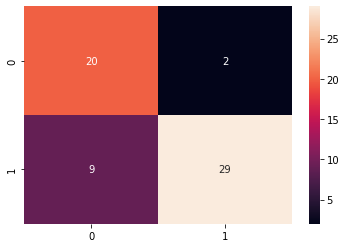

In [97]:
sns.heatmap(matrix,annot = True, fmt = "d")

**precision Score**

In [98]:
from sklearn.metrics import precision_score

In [99]:
precision = precision_score(Y_test, y_pred_lr)

In [100]:
print("Precision: ",precision)

Precision:  0.9354838709677419


**Recall**

In [101]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_lr)
print("Recall is: ",recall)

Recall is:  0.7631578947368421


**F-Score**

In [102]:
print((2*precision*recall)/(precision+recall))

CM =pd.crosstab(Y_test, y_pred_lr)
CM

0.8405797101449276


col_0,0,1
condition,,
0,20,2
1,9,29


In [103]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr=FN*100/(FN+TP)
fnr

23.68421052631579

**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0]


**Learning curve for Training score & cross validation score**

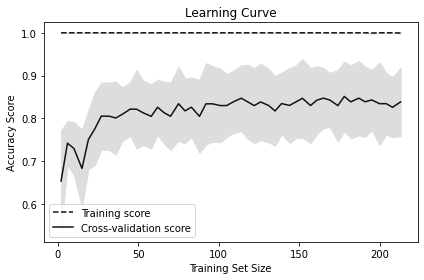

In [105]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [106]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 75.0 %


In [107]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


In [108]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.873
Accuracy on test set: 0.750


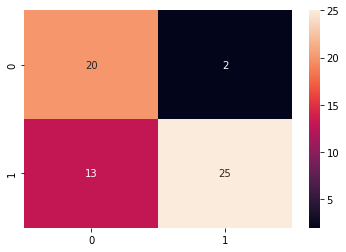

In [109]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

In [110]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  0.9259259259259259


In [111]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_rf)
print("Recall is: ",recall)

Recall is:  0.6578947368421053


In [112]:
print((2*precision*recall)/(precision+recall))

CM =pd.crosstab(Y_test, y_pred_rf)
CM

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr=FN*100/(FN+TP)
fnr

0.7692307692307692


34.21052631578947

**Naive Bayes**

In [113]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 85.65%
Test accuracy: 83.33%
[0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0]


In [114]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 83.33 %


In [115]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 85.65%
Test accuracy: 83.33%


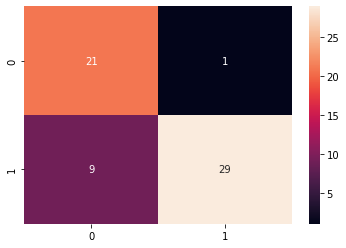

In [116]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")

In [117]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)

Precision:  0.9666666666666667


In [118]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_nb)
print("Recall is: ",recall)

Recall is:  0.7631578947368421


In [119]:
print((2*precision*recall)/(precision+recall))

CM = pd.crosstab(Y_test, y_pred_nb)
CM

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr = FN*100/(FN+TP)
fnr

0.8529411764705883


23.68421052631579

**KNN(K Nearest Neighbors)**

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 72.57%
Test accuracy: 61.67%
[0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]


In [121]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 61.67 %


In [122]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 76.37%
Test accuracy: 60.00%


In [123]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 48.33%
n_neigbors = 2
Train accuracy: 81.43%
Test accuracy: 55.00%
n_neigbors = 3
Train accuracy: 78.90%
Test accuracy: 60.00%
n_neigbors = 4
Train accuracy: 76.37%
Test accuracy: 53.33%
n_neigbors = 5
Train accuracy: 76.37%
Test accuracy: 60.00%
n_neigbors = 6
Train accuracy: 73.84%
Test accuracy: 60.00%
n_neigbors = 7
Train accuracy: 75.53%
Test accuracy: 61.67%
n_neigbors = 8
Train accuracy: 72.57%
Test accuracy: 61.67%
n_neigbors = 9
Train accuracy: 73.84%
Test accuracy: 60.00%


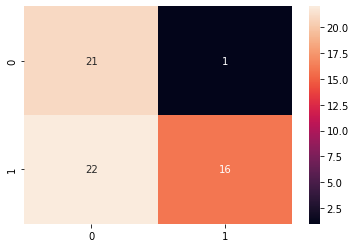

In [124]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

In [126]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.9411764705882353


In [127]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_knn)
print("Recall is: ",recall)

Recall is:  0.42105263157894735


In [128]:
print((2*precision*recall)/(precision+recall))

CM = pd.crosstab(Y_test, y_pred_knn)
CM

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

fnr = FN*100/(FN+TP)
fnr

0.5818181818181818


57.89473684210526

**Decision Tree**

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0]


In [133]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 68.33 %


In [134]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.683


In [135]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.852
Accuracy on test set: 0.683


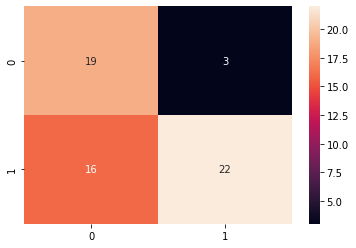

In [136]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

In [137]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.88


In [138]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_dt)
print("Recall is: ",recall)

Recall is:  0.5789473684210527


In [139]:
print((2*precision*recall)/(precision+recall))

CM = pd.crosstab(Y_test, y_pred_dt)
CM

TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

0.6984126984126985


42.10526315789474

In [140]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [141]:
ann = tf.keras.models.Sequential()

In [143]:
dataset = pd.read_csv('/content/sample_data/2.1heart_cleveland_upload.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [146]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 0.6870 - accuracy: 0.5823
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5823
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6854 - accuracy: 0.5823
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.5823
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5823
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.5823
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.5823
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5823
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5823
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6812 - accuracy: 0.5823
Epoch 11/100
2/2 [===========

In [152]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [153]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.616667
Decision Trees,0.650000
Logistic Regression,0.816667
Naive Bayes,0.833333
Random Forests,0.783333


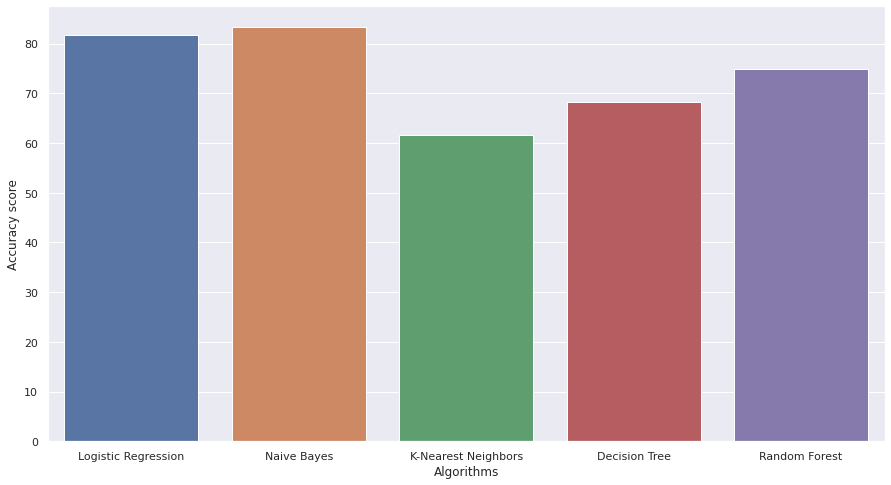

In [154]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)